In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variate analysis**

- Analysis the two variables

- Two categorical columns

-two numerical 

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num=visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many asia people got the visa Certified***

**How many asia people got the visa Denied**

In [8]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=="Certified"
con=con1 & con2
len(visa_df[con])
print(f"the number of employes visa certified are :{len(visa_df[con])}")

the number of employes visa certified are :11012


In [9]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=="Denied"
con=con1 & con2
len(visa_df[con])
print(f"the number of employes visa Denied are :{len(visa_df[con])}")

the number of employes visa Denied are :5849


In [10]:
keys=list(visa_df['continent'].unique())
certified_list,certified_den=[],[]

for i in keys:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1 & con2
    denial_con=con1 & con3
    certified_list.append(len(visa_df[certi_con]))
    certified_den.append(len(visa_df[denial_con]))
data=pd.DataFrame(zip(certified_list,certified_den),
                  columns=['Certified','Denied'],
                  index=keys,)
data

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [11]:
con1=visa_df['continent']
con2=visa_df['case_status']
r1=pd.crosstab(con1,con2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [12]:
con1=visa_df['continent']
con2=visa_df['case_status']
r2=pd.crosstab(con2,con1)
r2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

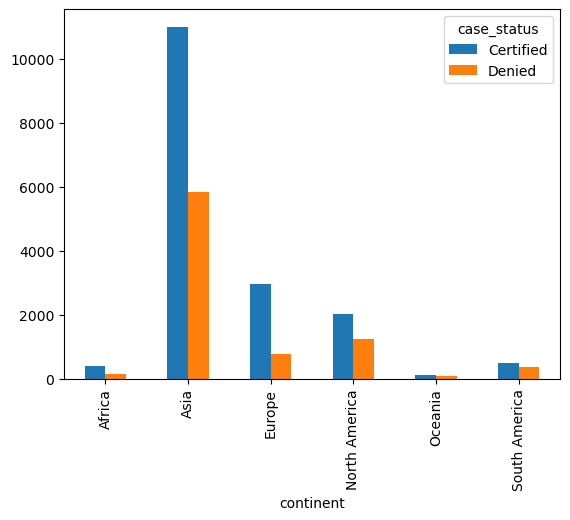

In [13]:
r1.plot(kind='bar')

<Axes: xlabel='case_status'>

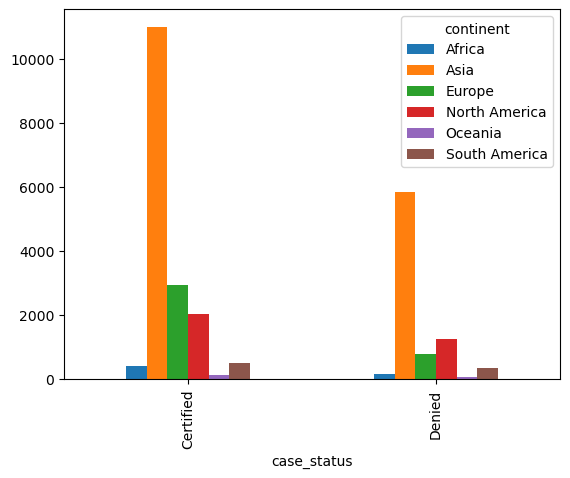

In [14]:
r2.plot(kind='bar')

In [15]:
con1=visa_df['continent']
con2=visa_df['education_of_employee']
con3=visa_df['case_status']
col=[con1,con2]
result3=pd.crosstab(col,con3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

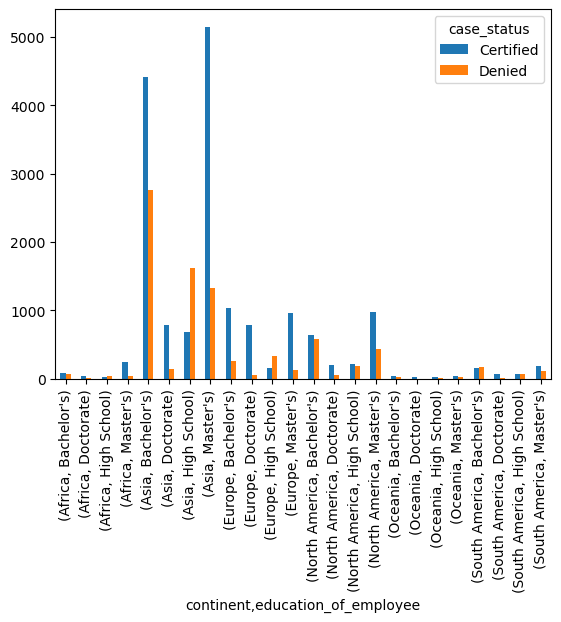

In [16]:
result3.plot(kind='bar')

Numerical-Numerical

- in order to 

$plt.scatter$

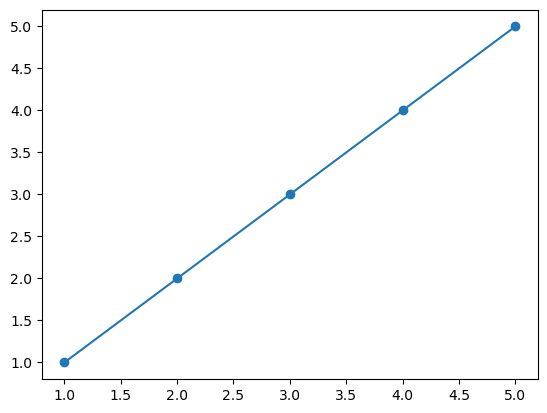

In [17]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

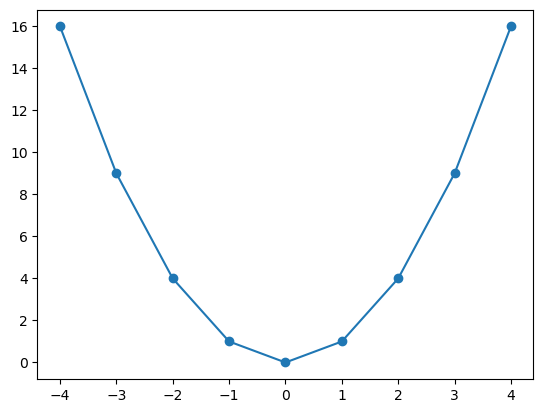

In [18]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

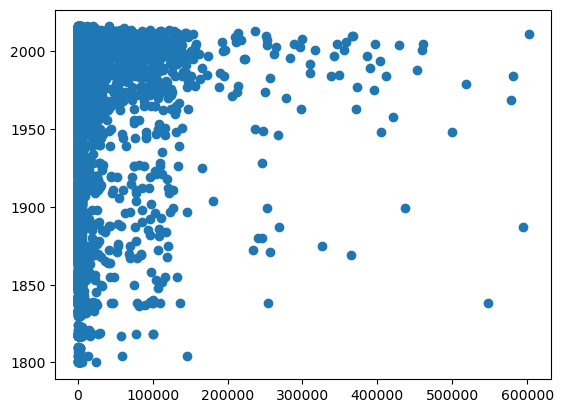

In [19]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

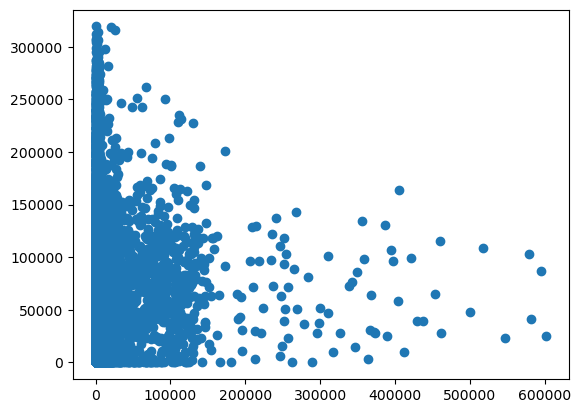

In [20]:
col1=visa_df['no_of_employees']
col3=visa_df['prevailing_wage']
plt.scatter(col1,col3)

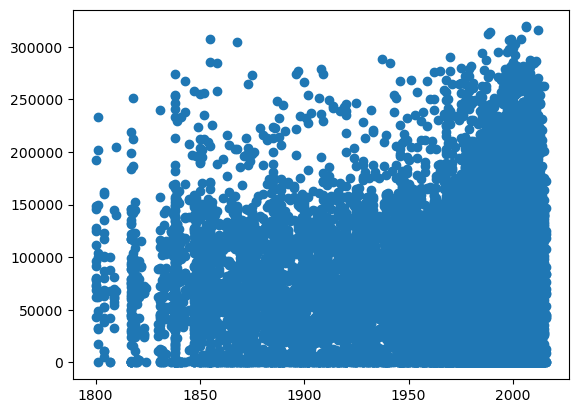

In [21]:
plt.scatter(col2,col3)

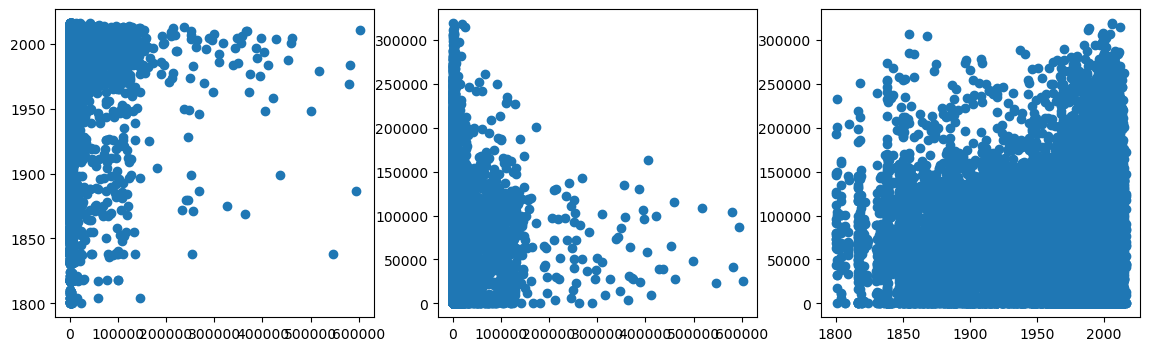

In [22]:
plt.figure(figsize=(14,4))
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']

plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

**Pearson coorealtion cooefcient**

<img src="https://th.bing.com/th/id/OIP.FFtSuKcWLqtta2bm3-BH6wAAAA?rs=1&amp;pid=ImgDetMain" alt="Pearson Correlation Coefficient - Statology" class=" nofocus" tabindex="0" aria-label="Pearson Correlation Coefficient - Statology" role="button">

In [23]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [24]:
wine_data=pd.read_csv(r"C:\Users\kanhu\OneDrive\Documents\data files\winequality_red - winequality_red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
wine_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [26]:
wine_data=wine_data.drop_duplicates()
wine_data.iloc[1:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [27]:
wine_data=wine_data.drop_duplicates()
wine_data.iloc[2:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
13,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [28]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
len(wine_data.columns)

12

In [30]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heat map**

- heat map will provide the matrix represenatation of correlation value

- heat map represnts values in color format

- different different 

<Axes: >

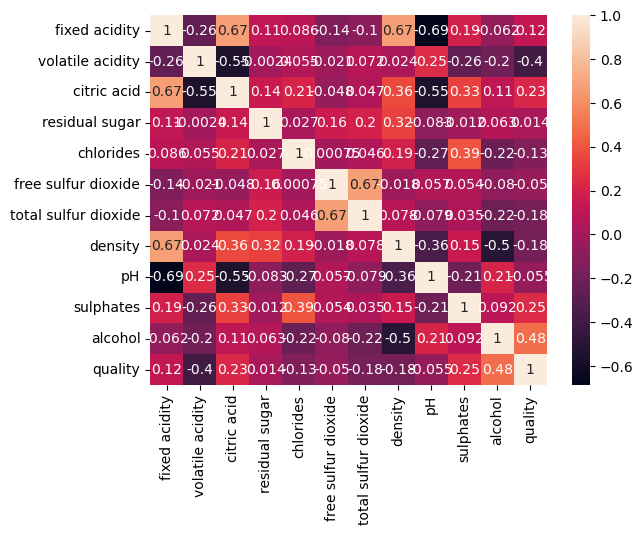

In [31]:
wine_corr=wine_data.corr()
sns.heatmap(wine_corr,
            annot=True)

In [32]:
!pip install seaborn --upgrade

<Axes: >

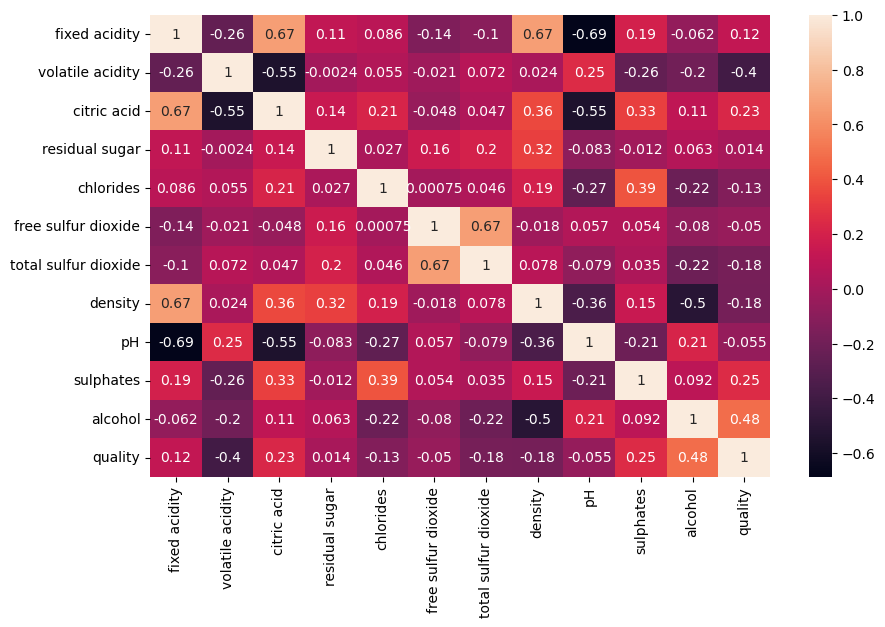

In [33]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,
            annot=True)

<Axes: >

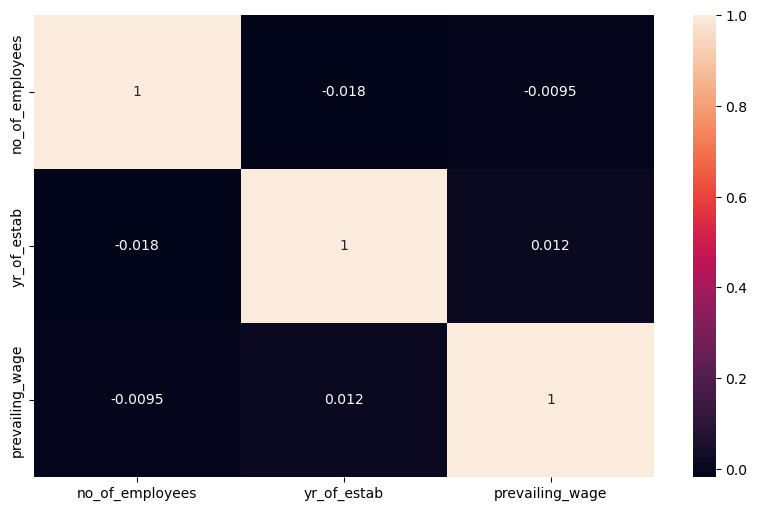

In [34]:
visa_corr=visa_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(visa_corr,annot=True)

In [35]:
# Draw the scatter

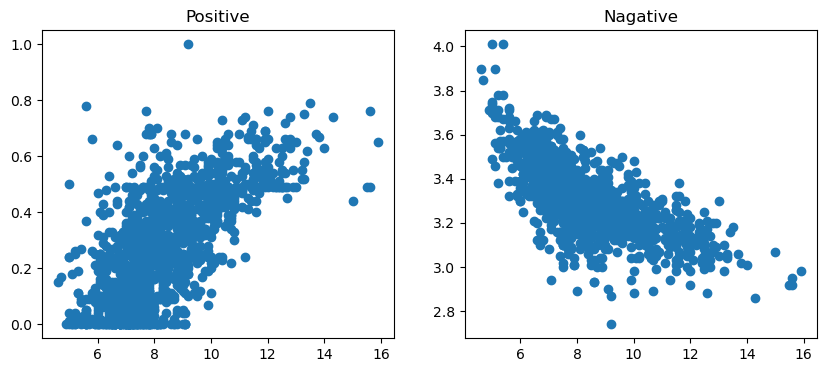

In [36]:
plt.figure(figsize=(10,4))
con1=wine_data['fixed acidity']
con2=wine_data['citric acid']
con3=wine_data['pH']
plt.subplot(1,2,1)
plt.scatter(con1,con2)
plt.title("Positive")
plt.subplot(1,2,2)
plt.scatter(con1,con3)
plt.title("Nagative")
plt.show()

<img height="200" width="312" data-src-hq="https://th.bing.com/th?id=OSK.HEROWu2zzUJYWr3VEZGPq9J9gRMWBm_SXZctKsuEbi3kznU&w=312&h=200&c=15&rs=2&o=6&dpr=1.3&pid=SANGAM" alt="All images" data-priority="2" id="emb11581CB21" class="rms_img" src="https://th.bing.com/th?id=OSK.HEROWu2zzUJYWr3VEZGPq9J9gRMWBm_SXZctKsuEbi3kznU&w=312&h=200&c=15&rs=2&o=6&dpr=1.3&pid=SANGAM" data-bm="48">